In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
titanic_train = pd.read_csv("csv/train.csv")
titanic_test = pd.read_csv("csv/test.csv")

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_test.shape

(418, 11)

In [7]:
titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

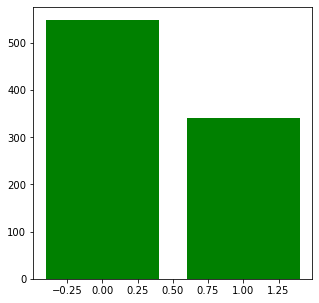

In [10]:
#visualization
plt.figure(figsize=(5,5))
plt.bar(titanic_train["Survived"].value_counts().keys(),list(titanic_train['Survived'].value_counts()), color="g")
plt.show()

In [11]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

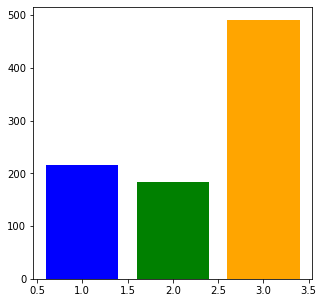

In [19]:
#visualization
plt.figure(figsize=(5,5))
plt.bar(titanic_train["Pclass"].value_counts().keys(),list(titanic_train["Pclass"].value_counts()), color=["Orange","Blue","Green"])
plt.show()

In [20]:
# sex counts
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

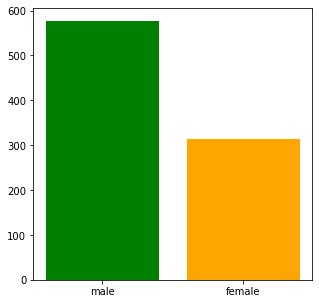

In [22]:
#visualization
plt.figure(figsize=(5,5))
plt.bar(titanic_train["Sex"].value_counts().keys(),list(titanic_train['Sex'].value_counts()), color=['green','orange'])
plt.show()

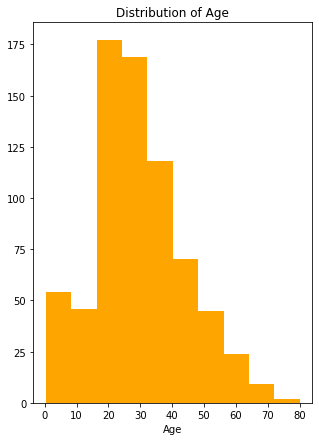

In [27]:
# visualization of distribution between male and female
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'],color="Orange")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

### Maching Leareing Prediction

In [29]:
#check null vakue of Survived column
sum(titanic_train["Survived"].isnull())

0

In [30]:
#check null vakue of Age column
sum(titanic_train["Age"].isnull())

177

In [31]:
#fill null value trough dropna()
titanic_train = titanic_train.dropna()

In [32]:
#Recheck null vakue of Survived column
sum(titanic_train["Survived"].isnull())

0

In [33]:
#Recheck null vakue of Age column
sum(titanic_train["Age"].isnull())

0

### Build Model

In [34]:
x_train = titanic_train[["Age"]]
y_train = titanic_train[["Survived"]]

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DTC = DecisionTreeClassifier()

In [38]:
# fit the model
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

### predicting value

In [40]:
#check null value of test Data of Age column
sum(titanic_test["Age"].isnull())

86

In [41]:
titanic_test = titanic_test.dropna()

In [42]:
#Recheck null value of test Data of Age column
sum(titanic_test["Age"].isnull())

0

In [43]:
x_test = titanic_test[["Age"]]

In [44]:
#predict
Y_predict = DTC.predict(x_test)

In [45]:
Y_predict

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [50]:
Y_predict.to_csv("Titanic Prediction", index= false)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'